# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**



---


*Grupo 9*
*   *Bosch, Candelaria*
*   *Juarez, Manuel*
*   *Mecchia, Martín*
*   *Montironi, Sebastian*




----
# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__

'5.13.1'

In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  

[3 rows x 21 columns]

In [ ]:
print(melb_df.columns)
print(np.shape(melb_df))

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
(13580, 21)


# A modo descriptivo se hace un analisis visual del dataframe utilizado de Kaggle:

---

*Utilizando las coordenadas ploteamos las propiedades en un mapa y observamos la distribucion espacial de los datos.*

---

In [ ]:
import plotly.express as px
data = melb_df
fig = px.scatter_mapbox(data, lat=data.Lattitude, lon=data.Longtitude, hover_name="Suburb",hover_data= ["Type", "Postcode"],
                        color=data.Price, color_continuous_scale=['green', 'yellow', 'red'])

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title = 'Precios de propiedades de Kaggle en Melbourne, Australia')



fig.show()

---

*Utilizamos la libreria Missingno y visualizamos cuáles columnas están completas. 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Car' están incompletas.*

---

Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna - Melb Dataframe')

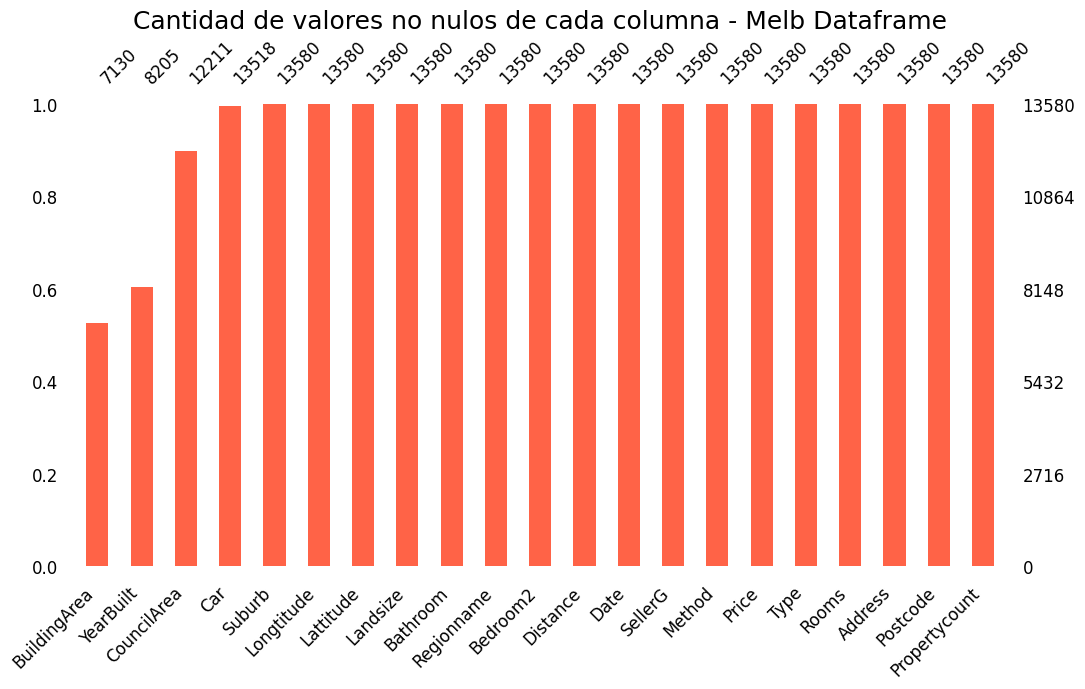

In [ ]:
import missingno as msno
msno.bar(melb_df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna - Melb Dataframe')

---

*En el siguiente gráfico observamos la posición donde se encuentran los datos faltantes.*

---

Text(0.5, 1.0, 'Matriz  de valores faltantes por variable segun index - Melb Dataframe')

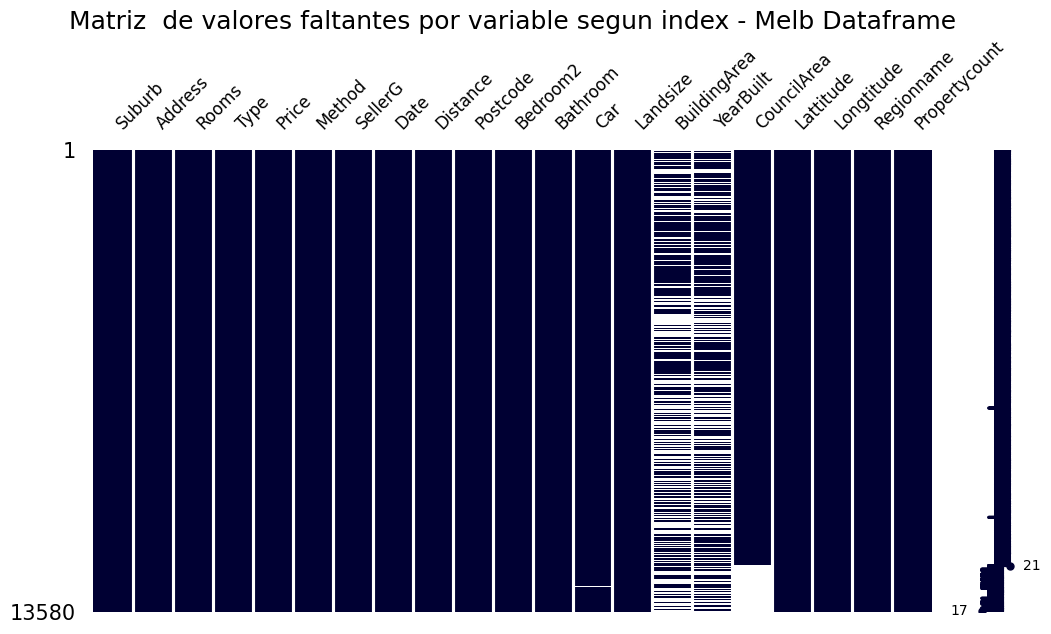

In [ ]:
msno.matrix(melb_df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])
plt.title('Matriz  de valores faltantes por variable segun index - Melb Dataframe')

---

*En las columnas 'BuildingArea' y 'YearBuilt' los datos faltantes están distribuidos al azar a lo largo del dataframe pero la columna 'CouncilArea' tiene datos faltantes de forma sistemática.*

---

## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite



In [ ]:
# Creamos un motor de base de datos SQLite y establecemos conexión con archivo llamado melbourne.sqlite3

engine = create_engine('sqlite:///melbourne.sqlite3', echo=True)

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

In [ ]:
# Ingestamos los datos del dataframe melb_df en una primera tabla

melb_df.to_sql('melbourne', con=engine, if_exists="replace")

2023-06-08 21:39:20,447 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:20,452 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("melbourne")


2023-06-08 21:39:20,459 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,465 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 21:39:20,468 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:20,471 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("melbourne")


2023-06-08 21:39:20,473 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,475 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 21:39:20,478 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:20,480 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-08 21:39:20,482 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,485 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-08 21:39:20,487 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,490 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_xinfo("melbourne")


2023-06-08 21:39:20,492 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,495 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2023-06-08 21:39:20,497 INFO sqlalchemy.engine.Engine [raw sql] ('melbourne',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('melbourne',)


2023-06-08 21:39:20,500 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("melbourne")


2023-06-08 21:39:20,503 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,505 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("melbourne")


2023-06-08 21:39:20,507 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,510 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2023-06-08 21:39:20,512 INFO sqlalchemy.engine.Engine [raw sql] ('melbourne',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('melbourne',)


2023-06-08 21:39:20,516 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("melbourne")


2023-06-08 21:39:20,519 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,522 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_melbourne_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_melbourne_index")


2023-06-08 21:39:20,524 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,527 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("melbourne")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("melbourne")


2023-06-08 21:39:20,530 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,532 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_melbourne_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_melbourne_index")


2023-06-08 21:39:20,534 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:20,537 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2023-06-08 21:39:20,539 INFO sqlalchemy.engine.Engine [raw sql] ('melbourne',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('melbourne',)


2023-06-08 21:39:20,787 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 21:39:20,798 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:20,801 INFO sqlalchemy.engine.Engine 
DROP TABLE melbourne


INFO:sqlalchemy.engine.Engine:
DROP TABLE melbourne


2023-06-08 21:39:20,805 INFO sqlalchemy.engine.Engine [no key 0.00418s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00418s] ()


2023-06-08 21:39:20,851 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 21:39:20,858 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:20,877 INFO sqlalchemy.engine.Engine 
CREATE TABLE melbourne (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE melbourne (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2023-06-08 21:39:20,880 INFO sqlalchemy.engine.Engine [no key 0.00361s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00361s] ()


2023-06-08 21:39:20,897 INFO sqlalchemy.engine.Engine CREATE INDEX ix_melbourne_index ON melbourne ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_melbourne_index ON melbourne ("index")


2023-06-08 21:39:20,899 INFO sqlalchemy.engine.Engine [no key 0.00221s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00221s] ()


2023-06-08 21:39:20,911 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 21:39:20,964 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:21,420 INFO sqlalchemy.engine.Engine INSERT INTO melbourne ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO melbourne ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-08 21:39:21,427 INFO sqlalchemy.engine.Engine [generated in 0.38026s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.38026s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2023-06-08 21:39:21,579 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


13580

In [ ]:
# Ahora vamos a importar el dataset de Airbnb

interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols,  low_memory=False)

---

*De mismo modo que con el dataset de Kaggle realizamos el analisis visual al dataset de Airbnb.*

---

---

*En el mapa observamos la distribucion espacial de los datos.*

---

In [ ]:
data = airbnb_df
fig = px.scatter_mapbox(data, lat=data.latitude, lon=data.longitude, hover_name="suburb",hover_data= [ "zipcode"],
                        color=data.price, color_continuous_scale='Magma_r', range_color=[0,10000])

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title = 'Precios de propiedades de Airbnb en Melbourne, Australia')

fig.show()

---

*Podemos ver que hay un outlier en en violeta oscuro que sale 12000 la noche. Puede afectar al calculo de media de precios que se hace mas adelante. A continuacion, mostramos el grafico sin ese outlier para mejor analisis cambiando el **range_color**.*

---

In [ ]:
import plotly.express as px
data = airbnb_df
fig = px.scatter_mapbox(data, lat=data.latitude, lon=data.longitude, hover_name="suburb",hover_data= [ "zipcode"],
                        color=data.price, color_continuous_scale='Magma_r', range_color=[0,400])

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title = 'Precios de propiedades de Airbnb en Melbourne, Australia')

fig.show()

---

*Utilizando la librería Missingno visualizamos cuáles columnas están completas. Solo 'street', 'city', 'latitude', 'longitude', 'price' lo están*

---

In [ ]:
print(airbnb_df.columns)
print(np.shape(airbnb_df))

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')
(22895, 13)


Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna - Airbnb Dataframe')

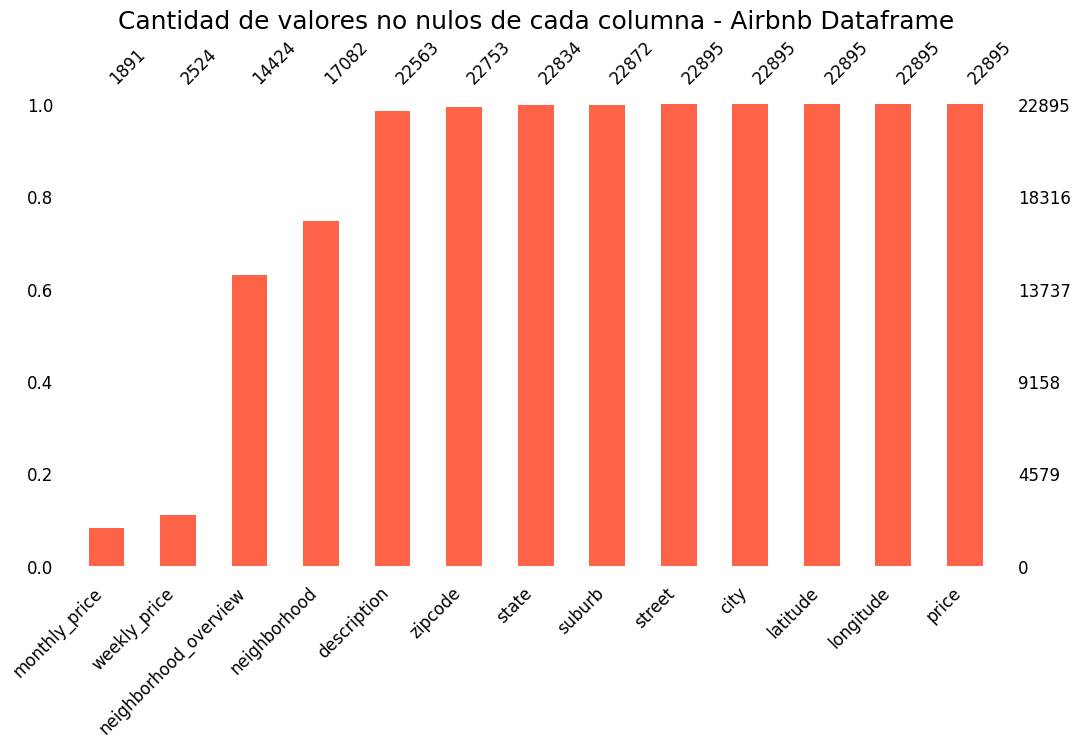

In [ ]:
import missingno as msno
msno.bar(airbnb_df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna - Airbnb Dataframe')

---

*Observamos en que posición se encuentran los datos faltantes.*

---

Text(0.5, 1.0, 'Matriz  de valores faltantes por variable segun index - Airbnb Dataframe')

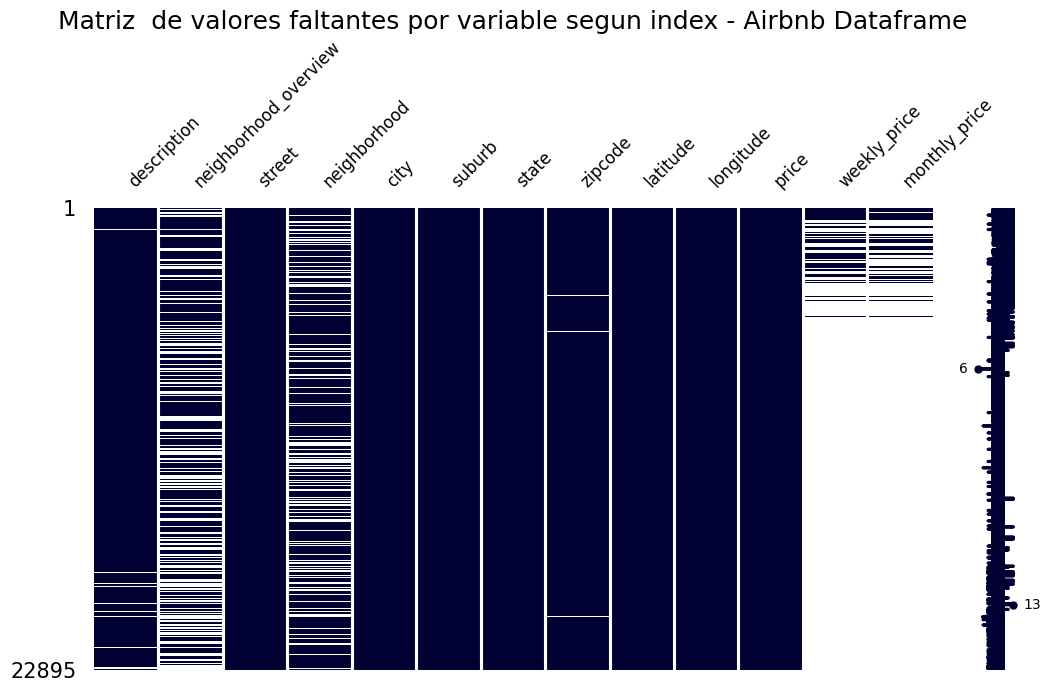

In [ ]:
msno.matrix(airbnb_df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

plt.title('Matriz  de valores faltantes por variable segun index - Airbnb Dataframe')

In [ ]:
# Realizamos las transformaciones necesarias para llegar al dataset generado en clase:

airbnb_df.drop(airbnb_df.price[ airbnb_df.price == 12501 ].index, axis=0, inplace=True) #Eliminamos el valor extremo

airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce') #Queda como float

airbnb_df['zipcode_int'] = airbnb_df.zipcode.fillna(0).astype('int') #Queda como int

relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode'] #Si sacamos weekly price? Monthly price? De que nos sirven? Preguntar a gise. No mete errores? Hay algunas medias que son calculadas por 4 datos quizas
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
.agg(airbnb_record_count=('price', 'count'),
airbnb_price_mean=('price', 'mean'),
airbnb_weekly_price_mean=('weekly_price', 'mean'),
airbnb_monthly_price_mean=('monthly_price', 'mean'))\
.reset_index()
airbnb_price_by_zipcode[:10]

zipcode  airbnb_record_count  airbnb_price_mean  airbnb_weekly_price_mean  \
0   2010.0                    1          40.000000                       NaN   
1   2134.0                    1          50.000000                       NaN   
2   2582.0                    1         104.000000                       NaN   
3   3000.0                 3367         150.504307                918.738956   
4   3001.0                    2         132.500000                       NaN   
5   3002.0                  197         200.979695                956.379310   
6   3003.0                  267         130.205993                760.200000   
7   3004.0                  728         158.271978               1061.171429   
8   3006.0                 1268         188.851735               1239.827273   
9   3008.0                  616         177.011364               1025.275862   

   airbnb_monthly_price_mean  
0                        NaN  
1                        NaN  
2                        NaN  
3                3407.204651  
4                        NaN  
5                3712.714286  
6                2629.500000  
7                3759.925926  
8                4358.556701  
9                3222.833333

In [ ]:
#Exploramos dimensiones dataset aribnb
print(airbnb_df.info()) #Df inicial. Sirve para el ejercicio 2 "Pandas", inciso 3. Lo de investigar otras variables para unir dfs.
print(airbnb_price_by_zipcode.columns) #Df reagrupado
print(np.shape(airbnb_price_by_zipcode))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22894 entries, 0 to 22894
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22894 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22894 non-null  object 
 5   suburb                 22871 non-null  object 
 6   state                  22833 non-null  object 
 7   zipcode                22748 non-null  float64
 8   latitude               22894 non-null  float64
 9   longitude              22894 non-null  float64
 10  price                  22894 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
 13  zipcode_int            22894 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 2.6+ 

In [ ]:
# Ingestamos los datos del dataframe airbnb_price_by_zipcode en una segunda tabla:

airbnb_price_by_zipcode.to_sql('airbnb', con=engine, if_exists="replace")

2023-06-08 21:39:33,838 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:33,844 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb")


2023-06-08 21:39:33,848 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,856 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 21:39:33,862 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:33,867 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb")


2023-06-08 21:39:33,872 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,877 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 21:39:33,882 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:33,888 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-08 21:39:33,894 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,906 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-08 21:39:33,908 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,912 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_xinfo("airbnb")


2023-06-08 21:39:33,914 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,917 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2023-06-08 21:39:33,920 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('airbnb',)


2023-06-08 21:39:33,922 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("airbnb")


2023-06-08 21:39:33,925 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,927 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("airbnb")


2023-06-08 21:39:33,929 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,932 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2023-06-08 21:39:33,934 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('airbnb',)


2023-06-08 21:39:33,937 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("airbnb")


2023-06-08 21:39:33,939 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,941 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_airbnb_index")


2023-06-08 21:39:33,944 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,946 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("airbnb")


2023-06-08 21:39:33,949 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,951 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_airbnb_index")


2023-06-08 21:39:33,953 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 21:39:33,956 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2023-06-08 21:39:33,958 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('airbnb',)


2023-06-08 21:39:33,962 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 21:39:33,965 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:33,967 INFO sqlalchemy.engine.Engine 
DROP TABLE airbnb


INFO:sqlalchemy.engine.Engine:
DROP TABLE airbnb


2023-06-08 21:39:33,969 INFO sqlalchemy.engine.Engine [no key 0.00214s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00214s] ()


2023-06-08 21:39:33,980 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 21:39:33,984 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:33,987 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_price_mean FLOAT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE airbnb (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_price_mean FLOAT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)




2023-06-08 21:39:33,989 INFO sqlalchemy.engine.Engine [no key 0.00220s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00220s] ()


2023-06-08 21:39:34,000 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_airbnb_index ON airbnb ("index")


2023-06-08 21:39:34,002 INFO sqlalchemy.engine.Engine [no key 0.00237s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00237s] ()


2023-06-08 21:39:34,014 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 21:39:34,018 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:34,024 INFO sqlalchemy.engine.Engine INSERT INTO airbnb ("index", zipcode, airbnb_record_count, airbnb_price_mean, airbnb_weekly_price_mean, airbnb_monthly_price_mean) VALUES (?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO airbnb ("index", zipcode, airbnb_record_count, airbnb_price_mean, airbnb_weekly_price_mean, airbnb_monthly_price_mean) VALUES (?, ?, ?, ?, ?, ?)


2023-06-08 21:39:34,027 INFO sqlalchemy.engine.Engine [generated in 0.00441s] [(0, 2010.0, 1, 40.0, None, None), (1, 2134.0, 1, 50.0, None, None), (2, 2582.0, 1, 104.0, None, None), (3, 3000.0, 3367, 150.5043065043065, 918.7389558232932, 3407.204651162791), (4, 3001.0, 2, 132.5, None, None), (5, 3002.0, 197, 200.9796954314721, 956.3793103448276, 3712.714285714286), (6, 3003.0, 267, 130.20599250936328, 760.2, 2629.5), (7, 3004.0, 728, 158.27197802197801, 1061.1714285714286, 3759.925925925926)  ... displaying 10 of 247 total bound parameter sets ...  (245, 9540.0, 1, 245.0, None, None), (246, 30122.0, 1, 75.0, 525.0, 2281.0)]


INFO:sqlalchemy.engine.Engine:[generated in 0.00441s] [(0, 2010.0, 1, 40.0, None, None), (1, 2134.0, 1, 50.0, None, None), (2, 2582.0, 1, 104.0, None, None), (3, 3000.0, 3367, 150.5043065043065, 918.7389558232932, 3407.204651162791), (4, 3001.0, 2, 132.5, None, None), (5, 3002.0, 197, 200.9796954314721, 956.3793103448276, 3712.714285714286), (6, 3003.0, 267, 130.20599250936328, 760.2, 2629.5), (7, 3004.0, 728, 158.27197802197801, 1061.1714285714286, 3759.925925925926)  ... displaying 10 of 247 total bound parameter sets ...  (245, 9540.0, 1, 245.0, None, None), (246, 30122.0, 1, 75.0, 525.0, 2281.0)]


2023-06-08 21:39:34,031 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


247

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

In [ ]:
# Creamos dos consultas de SQL:

query1 = "SELECT CouncilArea, COUNT(1) FROM melbourne GROUP BY CouncilArea ORDER BY COUNT(1) DESC"
query2 = "SELECT Suburb, CouncilArea, COUNT(1) FROM melbourne GROUP BY Suburb, CouncilArea ORDER BY COUNT(1) DESC"
queries = [query1, query2]

In [ ]:
# Implementamos las queries de SQL:

with engine.connect() as con:
    for query in queries:
      rs = con.execute(text(query))
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2023-06-08 21:39:34,057 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:34,060 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(1) FROM melbourne GROUP BY CouncilArea ORDER BY COUNT(1) DESC


INFO:sqlalchemy.engine.Engine:SELECT CouncilArea, COUNT(1) FROM melbourne GROUP BY CouncilArea ORDER BY COUNT(1) DESC


2023-06-08 21:39:34,062 INFO sqlalchemy.engine.Engine [generated in 0.00530s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00530s] ()


SELECT CouncilArea, COUNT(1) FROM melbourne GROUP BY CouncilArea ORDER BY COUNT(1) DESC
(None, 1369)
('Moreland', 1163)
('Boroondara', 1160)
('Moonee Valley', 997)
('Darebin', 934)
('Glen Eira', 848)
('Stonnington', 719)
('Maribyrnong', 692)
('Yarra', 647)
('Port Phillip', 628)
('Banyule', 594)
('Bayside', 489)
('Melbourne', 470)
('Hobsons Bay', 434)
('Brimbank', 424)
('Monash', 333)
('Manningham', 311)
('Whitehorse', 304)
('Kingston', 207)
('Whittlesea', 167)
('Hume', 164)
('Wyndham', 86)
('Maroondah', 80)
('Knox', 80)
('Melton', 66)
('Frankston', 53)
('Greater Dandenong', 52)
('Casey', 38)
('Nillumbik', 36)
('Yarra Ranges', 18)
('Cardinia', 8)
('Macedon Ranges', 7)
('Unavailable', 1)
('Moorabool', 1)



2023-06-08 21:39:34,109 INFO sqlalchemy.engine.Engine SELECT Suburb, CouncilArea, COUNT(1) FROM melbourne GROUP BY Suburb, CouncilArea ORDER BY COUNT(1) DESC


INFO:sqlalchemy.engine.Engine:SELECT Suburb, CouncilArea, COUNT(1) FROM melbourne GROUP BY Suburb, CouncilArea ORDER BY COUNT(1) DESC


2023-06-08 21:39:34,113 INFO sqlalchemy.engine.Engine [generated in 0.00358s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00358s] ()


SELECT Suburb, CouncilArea, COUNT(1) FROM melbourne GROUP BY Suburb, CouncilArea ORDER BY COUNT(1) DESC
('Reservoir', 'Darebin', 323)
('Richmond', 'Yarra', 251)
('Bentleigh East', 'Glen Eira', 234)
('Preston', 'Darebin', 228)
('Brunswick', 'Moreland', 208)
('Essendon', 'Moonee Valley', 208)
('Hawthorn', 'Boroondara', 186)
('Brighton', 'Bayside', 176)
('Coburg', 'Moreland', 176)
('Northcote', 'Darebin', 175)
('Pascoe Vale', 'Moreland', 161)
('St Kilda', 'Port Phillip', 160)
('Kew', 'Boroondara', 157)
('South Yarra', 'Stonnington', 157)
('Yarraville', 'Maribyrnong', 154)
('Balwyn North', 'Boroondara', 151)
('Glenroy', 'Moreland', 144)
('Moonee Ponds', 'Moonee Valley', 139)
('Carnegie', 'Glen Eira', 138)
('Thornbury', 'Darebin', 132)
('Bentleigh', 'Glen Eira', 131)
('Newport', 'Hobsons Bay', 129)
('Footscray', 'Maribyrnong', 126)
('Ascot Vale', 'Moonee Valley', 125)
('Elwood', 'Port Phillip', 125)
('Brighton East', 'Bayside', 124)
('Camberwell', 'Boroondara', 124)
('Glen Iris', 'Boroondar

INFO:sqlalchemy.engine.Engine:ROLLBACK


4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.

In [ ]:
# Creamos la query para implementar el JOIN:

query3 = "SELECT * FROM melbourne LEFT JOIN airbnb ON melbourne.Postcode = airbnb.zipcode"

# Implementamos la query:

with engine.connect() as con:
      rs = con.execute(text(query3))
      merged_df = pandas.DataFrame(rs.fetchall())
      for row in rs:
          print(row)

2023-06-08 21:39:34,182 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 21:39:34,186 INFO sqlalchemy.engine.Engine SELECT * FROM melbourne LEFT JOIN airbnb ON melbourne.Postcode = airbnb.zipcode


INFO:sqlalchemy.engine.Engine:SELECT * FROM melbourne LEFT JOIN airbnb ON melbourne.Postcode = airbnb.zipcode


2023-06-08 21:39:34,188 INFO sqlalchemy.engine.Engine [generated in 0.00619s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00619s] ()


2023-06-08 21:39:34,733 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


In [ ]:
# Eliminamos la columna index:

merged_df = merged_df.drop("index", axis=1)
merged_df

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  CouncilArea  Lattitude  \
0        Biggin   3/12/2016       2.5    3067.0  ...        Yarra  -37.79960   
1        Biggin   4/02/2016       2.5    3067.0  ...        Yarra  -37.80790   
2        Biggin   4/03/2017       2.5    3067.0  ...        Yarra  -37.80930   
3        Biggin   4/03/2017       2.5    3067.0  ...        Yarra  -37.79690   
4        Nelson   4/06/2016       2.5    3067.0  ...        Yarra  -37.80720   
...         ...         ...       ...       ...  ...          ...        ...   
13575     Barry  26/08/2017      16.7    3150.0  ...         None  -37.90562   
13576  Williams  26/08/2017       6.8    3016.0  ...         None  -37.85927   
13577     Raine  26/08/2017       6.8    3016.0  ...         None  -37.85274   
13578   Sweeney  26/08/2017       6.8    3016.0  ...         None  -37.85908   
13579   Village  26/08/2017       6.3    3013.0  ...         None  -37.81188   

       Longtitude                  Regionname  Propertycount  zipcode  \
0       144.99840       Northern Metropolitan         4019.0   3067.0   
1       144.99340       Northern Metropolitan         4019.0   3067.0   
2       144.99440       Northern Metropolitan         4019.0   3067.0   
3       144.99690       Northern Metropolitan         4019.0   3067.0   
4       144.99410       Northern Metropolitan         4019.0   3067.0   
...           ...                         ...            ...      ...   
13575   145.16761  South-Eastern Metropolitan         7392.0   3150.0   
13576   144.87904        Western Metropolitan         6380.0   3016.0   
13577   144.88738        Western Metropolitan         6380.0   3016.0   
13578   144.89299        Western Metropolitan         6380.0   3016.0   
13579   144.88449        Western Metropolitan         6543.0   3013.0   

      airbnb_record_count  airbnb_price_mean  airbnb_weekly_price_mean  \
0                   258.0         130.624031                605.152174   
1                   258.0         130.624031                605.152174   
2                   258.0         130.624031                605.152174   
3                   258.0         130.624031                605.152174   
4                   258.0         130.624031                605.152174   
...                   ...                ...                       ...   
13575               189.0         124.026455                526.350000   
13576                74.0         191.094595                612.250000   
13577                74.0         191.094595                612.250000   
13578                74.0         191.094595                612.250000   
13579                82.0         135.609756                923.571429   

      airbnb_monthly_price_mean  
0                   2187.032258  
1                   2187.032258  
2                   2187.032258  
3                   2187.032258  
4                   2187.032258  
...                         ...  
13575               1901.611111  
13576               2119.750000  
13577               2119.750000  
13578               2119.750000  
13579               2966.090909  

[13580 rows x

In [ ]:
merged_df.shape

(13580, 26)

In [ ]:
merged_df.columns.to_list()

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'zipcode',
 'airbnb_record_count',
 'airbnb_price_mean',
 'airbnb_weekly_price_mean',
 'airbnb_monthly_price_mean']

## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [ ]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
#Method
melb_df['Method'].unique() #No tiene relevancia para el analisis la forma en la que se vendio la propiedad. Se elimina.

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [ ]:
#SellerG
melb_df['SellerG'].unique() #No interesa saber el nombre del vendedor. Se elimina.

array(['Biggin', 'Nelson', 'Jellis', 'Greg', 'LITTLE', 'Collins', 'Kay',
       'Beller', 'Marshall', 'Brad', 'Maddison', 'Barry', 'Considine',
       'Rendina', 'Propertyau', 'McDonald', 'Prof.', 'Harcourts',
       'hockingstuart', 'Thomson', 'Buxton', 'RT', "Sotheby's", 'Cayzer',
       'Chisholm', 'Brace', 'Miles', 'McGrath', 'Love', 'Barlow',
       'Sweeney', 'Village', 'Jas', 'Gunn&Co', 'Burnham', 'Williams',
       'Compton', 'FN', 'Raine&Horne', 'Hunter', 'Noel', 'Hodges', 'Ray',
       'Gary', 'Fletchers', 'Woodards', 'Raine', 'Walshe', 'Alexkarbon',
       'Weda', 'Frank', 'Stockdale', 'Tim', 'Purplebricks', 'Moonee',
       'HAR', 'Edward', 'Philip', 'RW', 'North', 'Ascend', 'Christopher',
       'Mandy', 'R&H', 'Fletchers/One', 'Assisi', 'One', "O'Brien", 'C21',
       'Bayside', 'Paul', 'First', 'Matthew', 'Anderson', 'Nick',
       'Lindellas', 'Allens', 'Bells', 'Trimson', 'Douglas', 'YPA', 'GL',
       "Tiernan's", 'J', 'Harrington', 'Dingle', 'Chambers', 'Peter',
    

In [ ]:
print(np.shape(melb_df.Address)) #Cantidad de datos dentro de Address.
print(np.shape(melb_df.Address.unique())) #Cantidad de datos que no tienen la misma direccion en Address.

(13580,)
(13378,)


In [ ]:
melb_df['Address'].value_counts()[:10] #Aca podemos ver las primeras 10 direcciones que son compartidas por mas de una propiedad.

36 Aberfeldie St    3
2 Bruce St          3
5 Charles St        3
53 William St       3
14 Arthur St        3
28 Blair St         3
5 Margaret St       3
1/1 Clarendon St    3
13 Robinson St      3
4 Bell St           2
Name: Address, dtype: int64

In [ ]:
#Propertycount: Numero de propiedades que existen en el barrio.
melb_df['Propertycount'].unique() #Puede ser relevante. Se deja en el df.

array([ 4019.,  3464.,  3280.,  2211.,  5301.,  5132.,  4836.,  6567.,
        3052.,  2894.,  4502.,  2952.,  5682.,  7809.,  6795., 10969.,
        4605.,  3589., 10579.,  6938., 11918.,  7082.,  4480.,  5678.,
        8920.,  3265.,  3106.,  7822.,  2379.,  6923.,  5051.,  3582.,
        2954., 11204.,  3445.,  4553.,  9028.,  1651.,  4898.,  8989.,
        9264.,  1308.,  2970.,  5825.,  6244.,  3593.,  7570., 10412.,
        8870.,  1071.,  2606.,  5454.,  2356., 11308.,  2947.,  2674.,
        3145.,  5549.,  1202.,  5629.,  5263., 10331.,  2671.,   394.,
        3873.,  4675.,  8801.,  4918., 17496.,  2019.,  2079.,  6232.,
        2555.,  5498.,  2291.,  6821., 11364.,  2651.,  3692.,  2309.,
        7485.,  8648.,  7717., 14577., 21650., 14949.,  3540.,  2417.,
        5943., 14887.,  8400.,  1223., 13240.,  3284.,  3755.,  4217.,
        6763.,  5457.,  5420.,  7217.,  2698.,  2329.,  2230.,  6380.,
         802.,  4380.,  1369.,  6543.,  1543.,   790.,  5533.,   438.,
      

In [ ]:
#Analisis de variables: Rooms vs Bedrooms2
Bedroom2 = melb_df.Bedroom2
Rooms = melb_df.Rooms
pandas.crosstab(Bedroom2,Rooms) #La variable Rooms aporta mas informacion

Rooms      1     2     3     4    5   6   7   8   10
Bedroom2                                            
0.0         0     5     8     3    0   0   0   0   0
1.0       663    21     5     2    0   0   0   0   0
2.0        16  3539   162    19    1   0   0   0   0
3.0         2    74  5626   175   18   1   0   0   0
4.0         0     8    73  2473   42   4   0   1   0
5.0         0     1     5    15  531   2   2   0   0
6.0         0     0     0     0    2  59   0   2   0
7.0         0     0     0     0    1   1   8   0   0
8.0         0     0     0     0    1   0   0   4   0
9.0         0     0     1     1    0   0   0   1   0
10.0        0     0     0     0    0   0   0   0   1
20.0        0     0     1     0    0   0   0   0   0

La variable Rooms nos brinda más información que Bedroom2,hay mayor cantidad de estos datos.

In [ ]:
melb_df_copy1 = melb_df.copy()
melb_df_copy1[:3]

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  

[3 rows x 21 columns]

In [ ]:
columns_to_drop = ['Address', 'Method', 'SellerG', 'Date', 'Bedroom2', 'Regionname']
#Deberiamos droppear tambien: 'YearBuilt', 'BuildingArea'. No las sacamos porque
#en el siguiente entregables se piden.
#Dejamos:'Type', 'Distance', 'Propertycount'. Son relevantes para el analisis
#'Postcode' Se usa para hacer el merge con la df de airbnb
melb_df_copy1_dropped = melb_df_copy1.drop(columns_to_drop, axis=1)
melb_df_copy1_dropped

Suburb  Rooms Type      Price  Distance  Postcode  Bathroom  \
0         Abbotsford      2    h  1480000.0       2.5    3067.0       1.0   
1         Abbotsford      2    h  1035000.0       2.5    3067.0       1.0   
2         Abbotsford      3    h  1465000.0       2.5    3067.0       2.0   
3         Abbotsford      3    h   850000.0       2.5    3067.0       2.0   
4         Abbotsford      4    h  1600000.0       2.5    3067.0       1.0   
...              ...    ...  ...        ...       ...       ...       ...   
13575  Wheelers Hill      4    h  1245000.0      16.7    3150.0       2.0   
13576   Williamstown      3    h  1031000.0       6.8    3016.0       2.0   
13577   Williamstown      3    h  1170000.0       6.8    3016.0       2.0   
13578   Williamstown      4    h  2500000.0       6.8    3016.0       1.0   
13579     Yarraville      4    h  1285000.0       6.3    3013.0       1.0   

       Car  Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  \
0      1.0     202.0           NaN        NaN       Yarra  -37.79960   
1      0.0     156.0          79.0     1900.0       Yarra  -37.80790   
2      0.0     134.0         150.0     1900.0       Yarra  -37.80930   
3      1.0      94.0           NaN        NaN       Yarra  -37.79690   
4      2.0     120.0         142.0     2014.0       Yarra  -37.80720   
...    ...       ...           ...        ...         ...        ...   
13575  2.0     652.0           NaN     1981.0         NaN  -37.90562   
13576  2.0     333.0         133.0     1995.0         NaN  -37.85927   
13577  4.0     436.0           NaN     1997.0         NaN  -37.85274   
13578  5.0     866.0         157.0     1920.0         NaN  -37.85908   
13579  1.0     362.0         112.0     1920.0         NaN  -37.81188   

       Longtitude  Propertycount  
0       144.99840         4019.0  
1       144.99340         4019.0  
2       144.99440         4019.0  
3       144.99690         4019.0  
4       144.99410         4019.0  
...           ...            ...  
13575   145.16761         7392.0  
13576   144.87904         6380.0  
13577   144.88738         6380.0  
13578   144.89299         6380.0  
13579   144.88449         6543.0  

[13580 rows x 15 columns]

---

*Porque sacamos cada columna: 'Address' (No relevante), 'Method' (No relevante), 'SellerG'(No relevante), 'Date' (No relevante), 'Postcode' (Repetido con zipcode), 'Bedroom2' (Da mas informacion 'Rooms'), 'Regionname' (No relevante), 'airbnb_record_count' (No relevante, solo indica la cantidad de datos que se usaron para sacar las medias del df de aribnb),'airbnb_weekly_price_mean' (Puede estar calculada con muy pocos valores, no es confiable), 'airbnb_monthly_price_mean' (Puede estar calculada con muy pocos valores, no es confiable)*

---

---

*'Lattitude' y 'Longtitude' se dejan debido a que puede ser utilizadas para analisis geoespacial como por ejemplo [Interpolación con la Distancia Inversa Ponderada](https://https://acolita.com/interpolacion-con-la-distancia-inversa-ponderada-idw/) e [interpolación con Kriging](https://https://acolita.com/geoestadistica-interpolacion-con-kriging/)*

---

In [ ]:
#Analisis de valores extremos en columnas: 'Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude',
print(melb_df_copy1_dropped.Rooms.unique()) #Valores de 1 a 10. Razonable, parece que hay mansiones o residencias.
print(melb_df_copy1_dropped.Bathroom.unique()) #Valores de 0 a 8. No hay baños? Se equivocaron? Valores a imputar?
print(melb_df_copy1_dropped.Car.unique()) #Valores de 0 a 10, hay nans. Hay que imputar los nans. Raro que tengan 10 cocheras, se lo toma como valor extremo?
#print(melb_df_copy1_dropped.YearBuilt.min(),
#      melb_df_copy1_dropped.YearBuilt.max(),
#      melb_df_copy1_dropped.YearBuilt.isnull().values.any()) #Valores de 1196 a 2018, hay nans. Tan antiguos??? Valor extremo. Eliminar. Hay que imputar nans

[ 2  3  4  1  6  5  8  7 10]
[1. 2. 3. 4. 0. 7. 5. 6. 8.]
[ 1.  0.  2.  6.  5.  4.  3.  8.  7.  9. 10. nan]


In [ ]:
melb_df_copy1_dropped.describe()[['Price', 'Distance']]

Price      Distance
count  1.358000e+04  13580.000000
mean   1.075684e+06     10.137776
std    6.393107e+05      5.868725
min    8.500000e+04      0.000000
25%    6.500000e+05      6.100000
50%    9.030000e+05      9.200000
75%    1.330000e+06     13.000000
max    9.000000e+06     48.100000

In [ ]:
#Definimos una funcion para encontrar outliers usando el rango intercuartilico.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
columnas = ['Price', 'Distance'] #Columnas a filtrar outliers

for col in columnas:
    outliers = find_outliers_IQR(melb_df_copy1_dropped[col]) #Encontramos los outliers y los ponemos en una lista
    melb_df_copy1_dropped = melb_df_copy1_dropped[~melb_df_copy1_dropped[col].isin(outliers)] #Eliminamos outliers

melb_df_copy1_dropped

Suburb  Rooms Type      Price  Distance  Postcode  Bathroom  \
0         Abbotsford      2    h  1480000.0       2.5    3067.0       1.0   
1         Abbotsford      2    h  1035000.0       2.5    3067.0       1.0   
2         Abbotsford      3    h  1465000.0       2.5    3067.0       2.0   
3         Abbotsford      3    h   850000.0       2.5    3067.0       2.0   
4         Abbotsford      4    h  1600000.0       2.5    3067.0       1.0   
...              ...    ...  ...        ...       ...       ...       ...   
13574    Westmeadows      3    h   582000.0      16.5    3049.0       2.0   
13575  Wheelers Hill      4    h  1245000.0      16.7    3150.0       2.0   
13576   Williamstown      3    h  1031000.0       6.8    3016.0       2.0   
13577   Williamstown      3    h  1170000.0       6.8    3016.0       2.0   
13579     Yarraville      4    h  1285000.0       6.3    3013.0       1.0   

       Car  Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  \
0      1.0     202.0           NaN        NaN       Yarra  -37.79960   
1      0.0     156.0          79.0     1900.0       Yarra  -37.80790   
2      0.0     134.0         150.0     1900.0       Yarra  -37.80930   
3      1.0      94.0           NaN        NaN       Yarra  -37.79690   
4      2.0     120.0         142.0     2014.0       Yarra  -37.80720   
...    ...       ...           ...        ...         ...        ...   
13574  2.0     256.0           NaN        NaN         NaN  -37.67917   
13575  2.0     652.0           NaN     1981.0         NaN  -37.90562   
13576  2.0     333.0         133.0     1995.0         NaN  -37.85927   
13577  4.0     436.0           NaN     1997.0         NaN  -37.85274   
13579  1.0     362.0         112.0     1920.0         NaN  -37.81188   

       Longtitude  Propertycount  
0       144.99840         4019.0  
1       144.99340         4019.0  
2       144.99440         4019.0  
3       144.99690         4019.0  
4       144.99410         4019.0  
...           ...            ...  
13574   144.89390         2474.0  
13575   145.16761         7392.0  
13576   144.87904         6380.0  
13577   144.88738         6380.0  
13579   144.88449         6543.0  

[12553 rows x 15 columns]

In [ ]:
merged_melb_airbnb_df = melb_df_copy1_dropped.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)

merged_melb_airbnb_df

Suburb  Rooms Type      Price  Distance  Postcode  Bathroom  \
0         Abbotsford      2    h  1480000.0       2.5    3067.0       1.0   
1         Abbotsford      2    h  1035000.0       2.5    3067.0       1.0   
2         Abbotsford      3    h  1465000.0       2.5    3067.0       2.0   
3         Abbotsford      3    h   850000.0       2.5    3067.0       2.0   
4         Abbotsford      4    h  1600000.0       2.5    3067.0       1.0   
...              ...    ...  ...        ...       ...       ...       ...   
12548    Westmeadows      3    h   582000.0      16.5    3049.0       2.0   
12549  Wheelers Hill      4    h  1245000.0      16.7    3150.0       2.0   
12550   Williamstown      3    h  1031000.0       6.8    3016.0       2.0   
12551   Williamstown      3    h  1170000.0       6.8    3016.0       2.0   
12552     Yarraville      4    h  1285000.0       6.3    3013.0       1.0   

       Car  Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  \
0      1.0     202.0           NaN        NaN       Yarra  -37.79960   
1      0.0     156.0          79.0     1900.0       Yarra  -37.80790   
2      0.0     134.0         150.0     1900.0       Yarra  -37.80930   
3      1.0      94.0           NaN        NaN       Yarra  -37.79690   
4      2.0     120.0         142.0     2014.0       Yarra  -37.80720   
...    ...       ...           ...        ...         ...        ...   
12548  2.0     256.0           NaN        NaN         NaN  -37.67917   
12549  2.0     652.0           NaN     1981.0         NaN  -37.90562   
12550  2.0     333.0         133.0     1995.0         NaN  -37.85927   
12551  4.0     436.0           NaN     1997.0         NaN  -37.85274   
12552  1.0     362.0         112.0     1920.0         NaN  -37.81188   

       Longtitude  Propertycount  zipcode  airbnb_record_count  \
0       144.99840         4019.0   3067.0                258.0   
1       144.99340         4019.0   3067.0                258.0   
2       144.99440         4019.0   3067.0                258.0   
3       144.99690         4019.0   3067.0                258.0   
4       144.99410         4019.0   3067.0                258.0   
...           ...            ...      ...                  ...   
12548   144.89390         2474.0   3049.0                 21.0   
12549   145.16761         7392.0   3150.0                189.0   
12550   144.87904         6380.0   3016.0                 74.0   
12551   144.88738         6380.0   3016.0                 74.0   
12552   144.88449         6543.0   3013.0                 82.0   

       airbnb_price_mean  airbnb_weekly_price_mean  airbnb_monthly_price_mean  
0             130.624031                605.152174                2187.032258  
1             130.624031                605.152174                2187.032258  
2             130.624031                605.152174                2187.032258  
3             130.624031                605.152174                2187.032258  
4             130.624031                605.152174                2187.032258  
...                  ...                       ...                        ...  
12548          92.285714                400.000000                        NaN  
12549         124.026455                526.350000                1901.611111  
12550         191.094595                612.250000                2119.750000  
12551         191.094595                612.250000                2119.750000  
12552         135.609756                923.571429                2966.090909  

[12553 rows x 20 columns]

In [ ]:
columns_to_drop = ['airbnb_record_count','airbnb_weekly_price_mean', 'airbnb_monthly_price_mean','Postcode']
merged_melb_airbnb_df_copy = merged_melb_airbnb_df.copy()
merged_melb_airbnb_df_copy_dropped = merged_melb_airbnb_df_copy.drop(columns_to_drop, axis=1)
merged_melb_airbnb_df_copy_dropped[:3]

Suburb  Rooms Type      Price  Distance  Bathroom  Car  Landsize  \
0  Abbotsford      2    h  1480000.0       2.5       1.0  1.0     202.0   
1  Abbotsford      2    h  1035000.0       2.5       1.0  0.0     156.0   
2  Abbotsford      3    h  1465000.0       2.5       2.0  0.0     134.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  Propertycount  \
0           NaN        NaN       Yarra   -37.7996    144.9984         4019.0   
1          79.0     1900.0       Yarra   -37.8079    144.9934         4019.0   
2         150.0     1900.0       Yarra   -37.8093    144.9944         4019.0   

   zipcode  airbnb_price_mean  
0   3067.0         130.624031  
1   3067.0         130.624031  
2   3067.0         130.624031

In [ ]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22894 entries, 0 to 22894
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22894 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22894 non-null  object 
 5   suburb                 22871 non-null  object 
 6   state                  22833 non-null  object 
 7   zipcode                22748 non-null  float64
 8   latitude               22894 non-null  float64
 9   longitude              22894 non-null  float64
 10  price                  22894 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
 13  zipcode_int            22894 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 2.6+ 

In [ ]:
print(len(airbnb_df.city.unique()))
print(len(melb_df.CouncilArea.unique()))

#Para el inciso 3 del ejercicio 2 podemos usar para mergear suburb y councilarea
#(Hay que ver el hueco en el grafico de mesh) con city

30
34


In [ ]:
merged_melb_airbnb_df_copy_dropped.columns.to_list()

['Suburb',
 'Rooms',
 'Type',
 'Price',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'zipcode',
 'airbnb_price_mean']

---

*Distribución espacial de los datos con el dataframe final.*

---

In [ ]:
data = merged_melb_airbnb_df_copy_dropped
fig = px.scatter_mapbox(data, lat=data.Lattitude, lon=data.Longtitude, hover_name="Suburb",
                        color=data.Price, color_continuous_scale='Magma_r')

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title = 'Precios de propiedades en Melbourne, Australia. Datos de Kaggle y Airbnb.')

fig.show()

In [ ]:
merged_melb_airbnb_df_copy_dropped.shape

(12553, 16)

---

*Sólo las columnas 'CouncilArea', 'Car', 'zipcode', 'airbnb_record_count' y 'airbnb_price_mean' no estan completas. Pero tienen más del 80% de los datos.
Las columnas BuildingArea y YearBuilt se dejan con menos del 80% de los datos ya que la consigna del entregable 2 lo pide.*


---

Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna - Melb+Airbnb Dataframes')

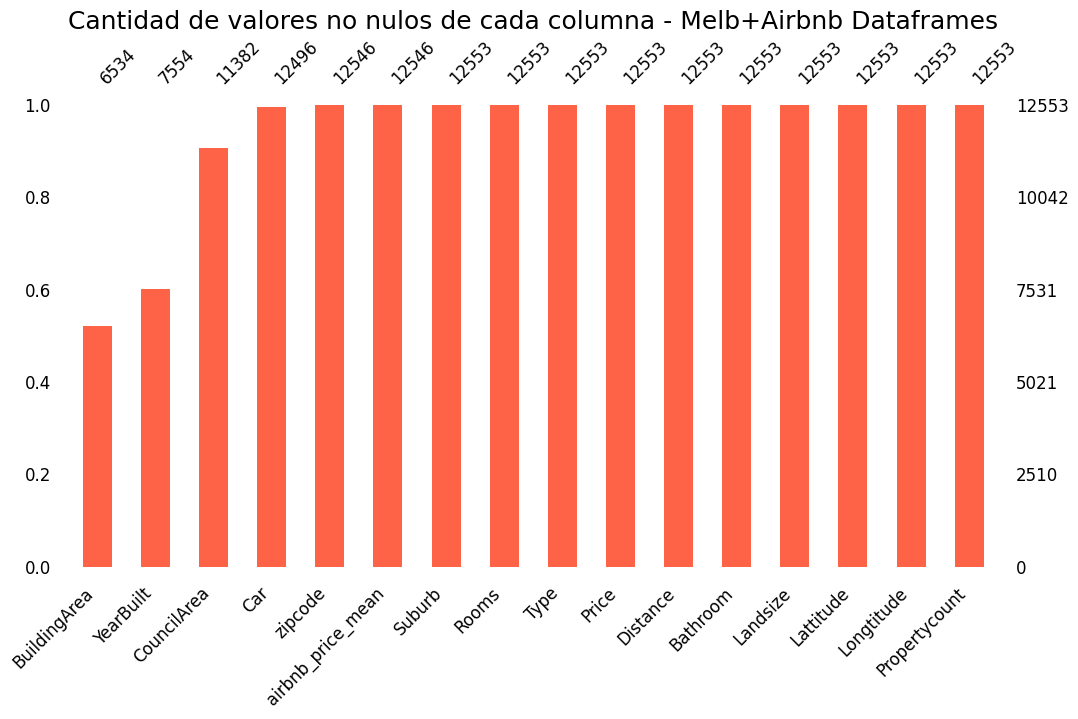

In [ ]:
msno.bar(merged_melb_airbnb_df_copy_dropped,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')

plt.title('Cantidad de valores no nulos de cada columna - Melb+Airbnb Dataframes')

---

*Observamos en que posición se encuentran los datos faltantes en el data frame final.*

---

Text(0.5, 1.0, 'Matriz  de valores faltantes por variable segun index - Melb+Airbnb Dataframes')

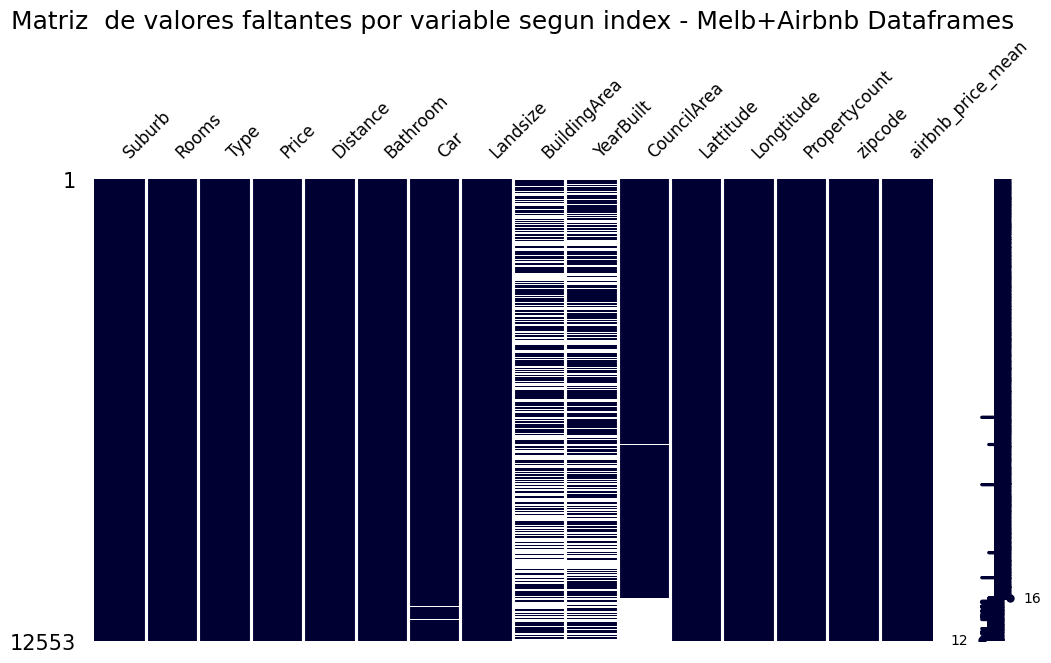

In [ ]:
msno.matrix(merged_melb_airbnb_df_copy_dropped,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

plt.title('Matriz  de valores faltantes por variable segun index - Melb+Airbnb Dataframes')

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
#Guardamos el .csv
from google.colab import files

merged_melb_airbnb_df_copy_dropped.to_csv("merged_melb_airbnb_df.csv", index=None)
files.download('merged_melb_airbnb_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)